# Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

from scipy.stats import skew

from sklearn.model_selection import cross_validate
import warnings
from sklearn.linear_model import LinearRegression


# These becuase we have many features, and we want to display all of them
pd.set_option("display.max_rows", 30)
pd.set_option("display.max_columns", 30)


plt.rcParams["figure.figsize"] = (7, 4)
import warnings

warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option("display.float_format", lambda x: "%.3f" % x)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv("/content/drive/MyDrive/final_scout_not_dummy.csv")

In [4]:
df2 = df.copy()

In [5]:
df.head()

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,56013.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,2.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1220.000,front,3.800
1,Audi A1,Sedans,14500,Price negotiable,80000.000,Used,Benzine,7.000,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",2.000,1.000,141.000,0,Metallic,Cloth,Automatic,1798.000,1255.000,front,5.600
2,Audi A1,Sedans,14640,VAT deductible,83450.000,Used,Diesel,7.000,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,1.000,85.000,0,Metallic,Cloth,Automatic,1598.000,1135.000,front,3.800
3,Audi A1,Sedans,14500,VAT deductible,73000.000,Used,Diesel,6.000,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",3.000,1.000,66.000,0,Metallic,Cloth,Automatic,1422.000,1195.000,front,3.800
4,Audi A1,Sedans,16790,VAT deductible,16200.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",3.000,1.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1135.000,front,4.100


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15915 entries, 0 to 15914
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15915 non-null  object 
 1   body_type            15915 non-null  object 
 2   price                15915 non-null  int64  
 3   vat                  15915 non-null  object 
 4   km                   15915 non-null  float64
 5   Type                 15915 non-null  object 
 6   Fuel                 15915 non-null  object 
 7   Gears                15915 non-null  float64
 8   Comfort_Convenience  15915 non-null  object 
 9   Entertainment_Media  15915 non-null  object 
 10  Extras               15915 non-null  object 
 11  Safety_Security      15915 non-null  object 
 12  age                  15915 non-null  float64
 13  Previous_Owners      15915 non-null  float64
 14  hp_kW                15915 non-null  float64
 15  Inspection_new       15915 non-null 

In [7]:
df.describe(include="O").T

,count,unique,top,freq
make_model,15915,9,Audi A3,3097
body_type,15915,8,Sedans,8004
vat,15915,2,VAT deductible,15044
Type,15915,5,Used,11095
Fuel,15915,4,Benzine,8548
Comfort_Convenience,15915,6196,"Air conditioning,Electrical side mirrors,Hill ...",388
Entertainment_Media,15915,346,"Bluetooth,Hands-free equipment,On-board comput...",1737
Extras,15915,659,Alloy wheels,5785
Safety_Security,15915,4442,"ABS,Central door lock,Daytime running lights,D...",729
Paint_Type,15915,3,Metallic,15246


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,15915.000,18024.381,7381.679,4950.000,12850.000,16900.000,21900.000,74600.000
km,15915.000,32089.996,36977.215,0.000,1920.500,20413.000,46900.000,317000.000
Gears,15915.000,5.937,0.705,5.000,5.000,6.000,6.000,8.000
age,15915.000,1.390,1.121,0.000,0.000,1.000,2.000,3.000
Previous_Owners,15915.000,1.043,0.339,0.000,1.000,1.000,1.000,4.000
hp_kW,15915.000,88.499,26.674,40.000,66.000,85.000,103.000,294.000
Inspection_new,15915.000,0.247,0.431,0.000,0.000,0.000,0.000,1.000
Displacement_cc,15915.000,1428.662,275.804,890.000,1229.000,1461.000,1598.000,2967.000
Weight_kg,15915.000,1337.701,199.682,840.000,1165.000,1295.000,1472.000,2471.000
cons_comb,15915.000,4.832,0.868,3.000,4.100,4.800,5.400,9.100


In [9]:
for col in df.select_dtypes('object'):
    print(f"{col:<20}:", df[col].nunique())

make_model          : 9
body_type           : 8
vat                 : 2
Type                : 5
Fuel                : 4
Comfort_Convenience : 6196
Entertainment_Media : 346
Extras              : 659
Safety_Security     : 4442
Paint_Type          : 3
Upholstery_type     : 2
Gearing_Type        : 3
Drive_chain         : 3


In [10]:
df.Previous_Owners.value_counts()

1.000    14158
2.000     1172
0.000      554
3.000       29
4.000        2
Name: Previous_Owners, dtype: int64

In [11]:
df.make_model.value_counts()

Audi A3           3097
Audi A1           2614
Opel Insignia     2598
Opel Astra        2525
Opel Corsa        2216
Renault Clio      1839
Renault Espace     991
Renault Duster      34
Audi A2              1
Name: make_model, dtype: int64

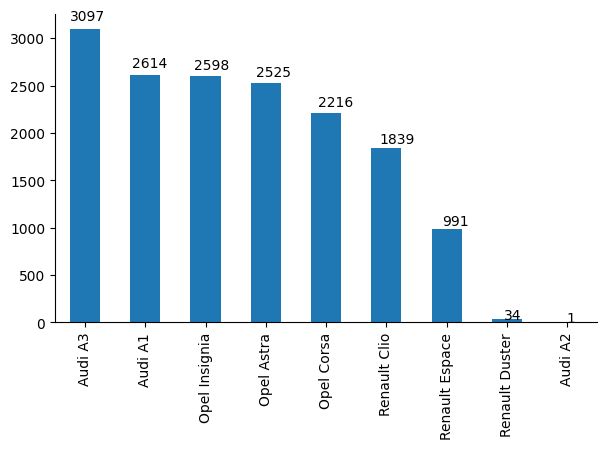

In [12]:
ax = df.make_model.value_counts().plot(kind ="bar")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.axis("off")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.03, p.get_height() * 1.03))

In [13]:
df[df.make_model=="Audi A2"]

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
2614,Audi A2,Off-Road,28200,VAT deductible,26166.000,Employee's car,Diesel,6.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...",Alloy wheels,"ABS,Adaptive Cruise Control,Central door lock,...",1.000,1.000,85.000,0,Metallic,Cloth,Manual,1598.000,1135.000,front,4.900


In [14]:
df.drop(index=[2614], inplace =True)

In [15]:
df.shape

(15914, 23)

In [16]:
# Check duplicates
df.duplicated().sum()

1673

In [17]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [18]:
df.isnull().sum()

make_model             0
body_type              0
price                  0
vat                    0
km                     0
Type                   0
Fuel                   0
Gears                  0
Comfort_Convenience    0
Entertainment_Media    0
Extras                 0
Safety_Security        0
age                    0
Previous_Owners        0
hp_kW                  0
Inspection_new         0
Paint_Type             0
Upholstery_type        0
Gearing_Type           0
Displacement_cc        0
Weight_kg              0
Drive_chain            0
cons_comb              0
dtype: int64

In [19]:
df.isnull().sum().any()

False

In [20]:
df.dropna(inplace=True)

In [21]:
# df.corr(numeric_only= True)

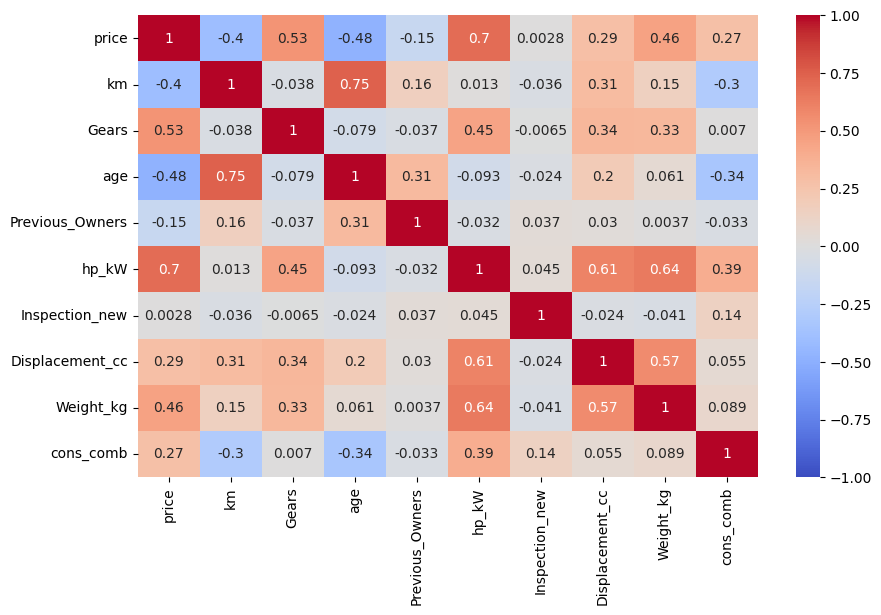

In [22]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), vmin=-1, vmax=1, annot =True, cmap="coolwarm");

<Axes: xlabel='price', ylabel='Count'>

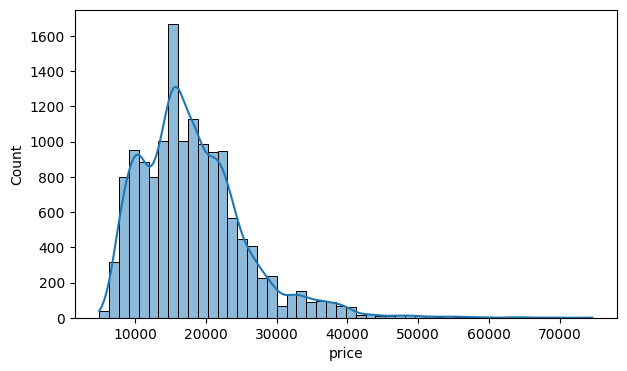

In [23]:
sns.histplot(df.price, bins=50, kde=True)

multicollinearity control

In [24]:
df_numeric = df.select_dtypes(include ="number")

In [25]:
df_numeric.corr()[(df_numeric.corr()>= 0.9) & (df_numeric.corr() < 1)].any().any()

False

In [26]:
df_numeric.corr()[(df_numeric.corr()<= -0.9) & (df_numeric.corr() > -1)].any().any()

False

<Axes: >

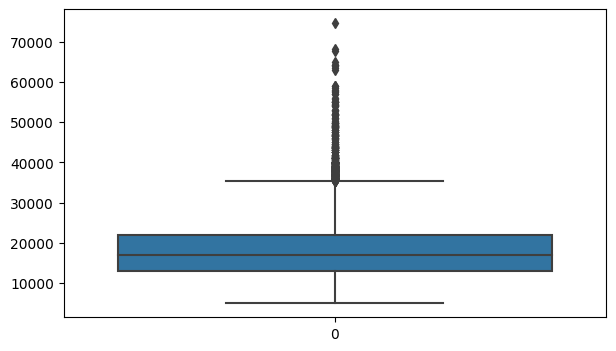

In [27]:
sns.boxplot(df.price)

<Axes: xlabel='make_model', ylabel='price'>

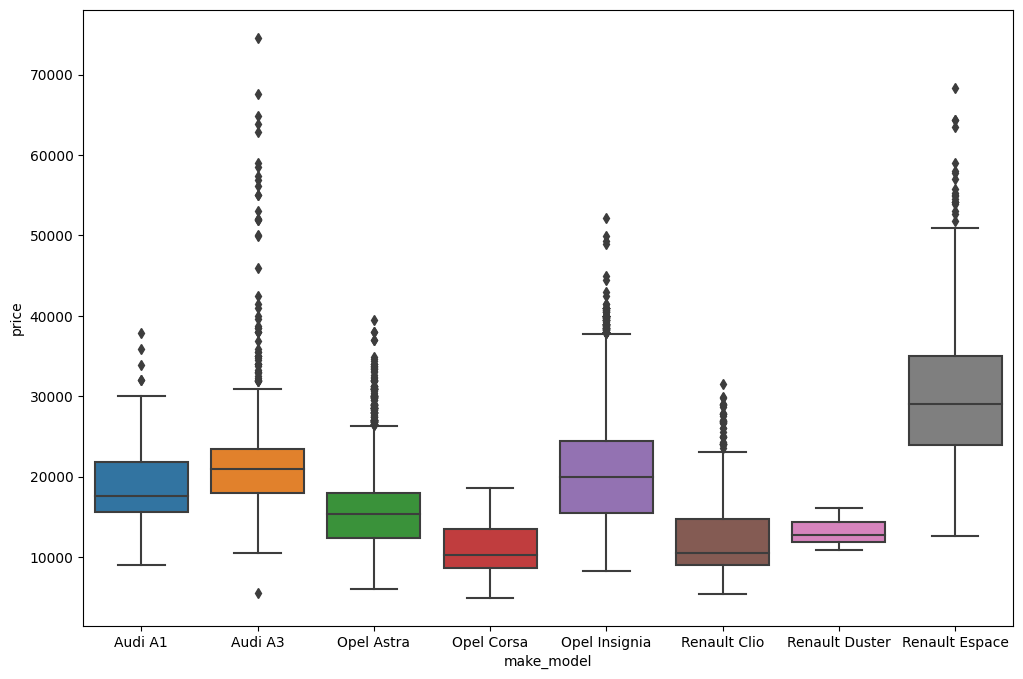

In [28]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df,
                y="price",
                x="make_model",
               )

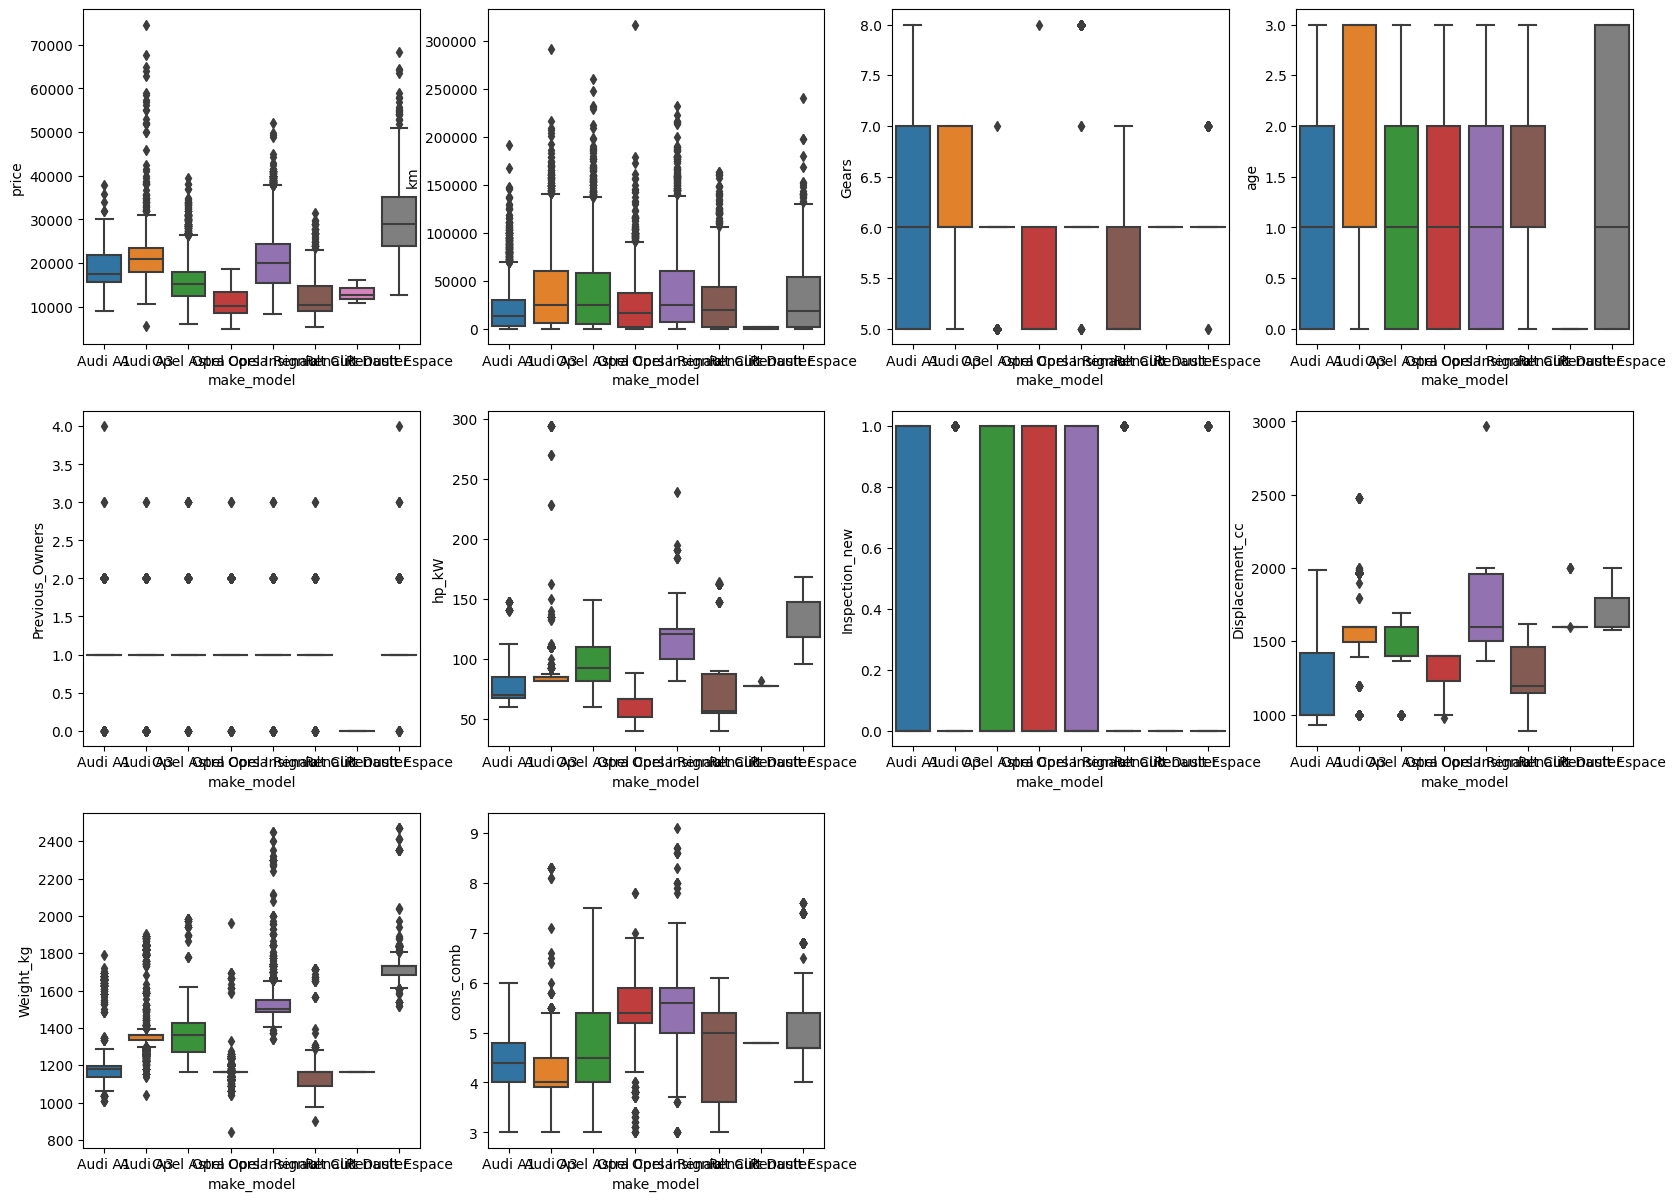

In [29]:
# Box plots

index = 0
plt.figure(figsize=(20,20))
for feature in df.select_dtypes("number"):
    if feature != "make_model":
        index += 1
        plt.subplot(4,4,index)
        sns.boxplot(x='make_model',y=feature,data=df)

# from box plots, we can have same insight as the pair plot

outlier

In [30]:
total_outliers = []

for model in df.make_model.unique():

    car_prices = df[df["make_model"]== model]["price"]

    Q1 = car_prices.quantile(0.25)
    Q3 = car_prices.quantile(0.75)
    IQR = Q3-Q1
    lower_lim = Q1-1.5*IQR
    upper_lim = Q3+1.5*IQR

    count_of_outliers = (car_prices[(car_prices < lower_lim) | (car_prices > upper_lim)]).count()

    total_outliers.append(count_of_outliers)

    print(f" The count of outlier for {model:<15} : {count_of_outliers:<5}, \
          The rate of outliers : {(count_of_outliers/len(df[df['make_model']== model])).round(3)}")
print()
print("Total_outliers : ",sum(total_outliers), "The rate of total outliers :", (sum(total_outliers)))

 The count of outlier for Audi A1         : 5    ,           The rate of outliers : 0.002
 The count of outlier for Audi A3         : 56   ,           The rate of outliers : 0.02
 The count of outlier for Opel Astra      : 127  ,           The rate of outliers : 0.055
 The count of outlier for Opel Corsa      : 0    ,           The rate of outliers : 0.0
 The count of outlier for Opel Insignia   : 109  ,           The rate of outliers : 0.045
 The count of outlier for Renault Clio    : 37   ,           The rate of outliers : 0.025
 The count of outlier for Renault Duster  : 0    ,           The rate of outliers : 0.0
 The count of outlier for Renault Espace  : 20   ,           The rate of outliers : 0.023

Total_outliers :  354 The rate of total outliers : 354


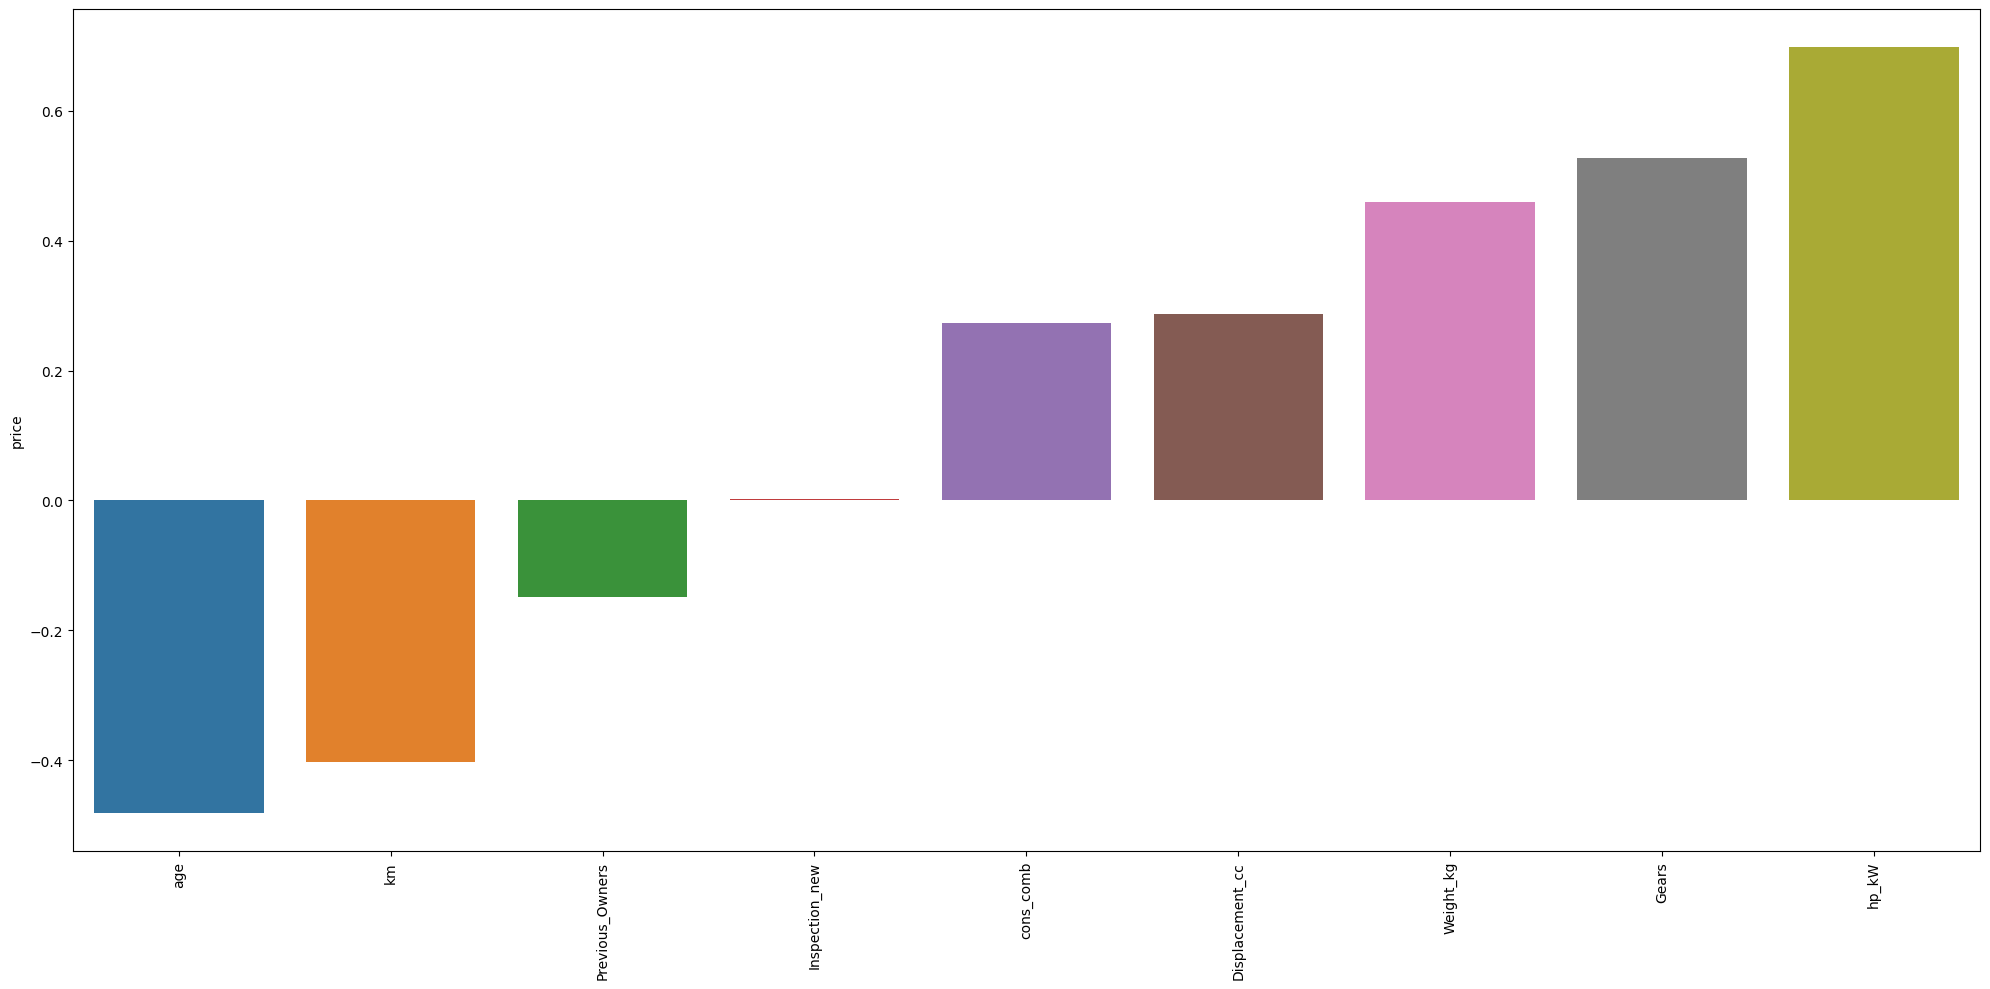

In [31]:
corr_by_price = df.corr()["price"].sort_values()[:-1]
plt.figure(figsize = (20,10))
sns.barplot(x = corr_by_price.index, y = corr_by_price)
plt.xticks(rotation=90)
plt.tight_layout();

## VIF

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [33]:
df_numeric_list = df_numeric.columns.tolist()
df_numeric_list

['price',
 'km',
 'Gears',
 'age',
 'Previous_Owners',
 'hp_kW',
 'Inspection_new',
 'Displacement_cc',
 'Weight_kg',
 'cons_comb']

In [34]:
numeric_columns =  df_numeric_list[1:]
numeric_columns

['km',
 'Gears',
 'age',
 'Previous_Owners',
 'hp_kW',
 'Inspection_new',
 'Displacement_cc',
 'Weight_kg',
 'cons_comb']

In [35]:
vif_data = pd.DataFrame()
predictors = numeric_columns
vif_data["Variable"] = predictors

# Calculate VIF scores for each predictor
vif_data["VIF"] = [
    variance_inflation_factor(df[numeric_columns].values, i) for i in range(len(predictors))
]

vif_data

,Variable,VIF
0,km,4.438
1,Gears,55.932
2,age,6.812
3,Previous_Owners,11.583
4,hp_kW,25.388
5,Inspection_new,1.382
6,Displacement_cc,53.453
7,Weight_kg,71.412
8,cons_comb,30.186


In [36]:
numeric_columns.remove('Weight_kg')

In [37]:
vif_data = pd.DataFrame()
predictors = numeric_columns
vif_data["Variable"] = predictors

# Calculate VIF scores for each predictor
vif_data["VIF"] = [
    variance_inflation_factor(df[numeric_columns].values, i) for i in range(len(predictors))
]

vif_data

,Variable,VIF
0,km,4.430
1,Gears,45.704
2,age,6.798
3,Previous_Owners,11.480
4,hp_kW,23.297
5,Inspection_new,1.377
6,Displacement_cc,47.553
7,cons_comb,29.245


In [38]:
numeric_columns.remove('Displacement_cc')

In [39]:
vif_data = pd.DataFrame()
predictors = numeric_columns
vif_data["Variable"] = predictors

# Calculate VIF scores for each predictor
vif_data["VIF"] = [
    variance_inflation_factor(df[numeric_columns].values, i) for i in range(len(predictors))
]

vif_data

,Variable,VIF
0,km,4.226
1,Gears,35.183
2,age,6.740
3,Previous_Owners,11.443
4,hp_kW,17.671
5,Inspection_new,1.374
6,cons_comb,28.868


In [40]:
numeric_columns.remove('Gears')

In [41]:
vif_data = pd.DataFrame()
predictors = numeric_columns
vif_data["Variable"] = predictors

# Calculate VIF scores for each predictor
vif_data["VIF"] = [
    variance_inflation_factor(df[numeric_columns].values, i) for i in range(len(predictors))
]

vif_data

,Variable,VIF
0,km,4.226
1,age,6.625
2,Previous_Owners,10.579
3,hp_kW,14.443
4,Inspection_new,1.372
5,cons_comb,20.094


Train | Test Split

In [42]:
X= df.drop(columns="price")
y= df.price

In [43]:
def trans_1(X, y, test_size = 0.2, random_state=101):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    X_train = X_train.join(X_train["Comfort_Convenience"].str.get_dummies(sep = ",").add_prefix("cc_"))
    X_train = X_train.join(X_train["Entertainment_Media"].str.get_dummies(sep = ",").add_prefix("em_"))
    X_train = X_train.join(X_train["Extras"].str.get_dummies(sep = ",").add_prefix("ex_"))
    X_train = X_train.join(X_train["Safety_Security"].str.get_dummies(sep = ",").add_prefix("ss_"))


    X_test = X_test.join(X_test["Comfort_Convenience"].str.get_dummies(sep = ",").add_prefix("cc_"))
    X_test = X_test.join(X_test["Entertainment_Media"].str.get_dummies(sep = ",").add_prefix("em_"))
    X_test = X_test.join(X_test["Extras"].str.get_dummies(sep = ",").add_prefix("ex_"))
    X_test = X_test.join(X_test["Safety_Security"].str.get_dummies(sep = ",").add_prefix("ss_"))

    X_test = X_test.reindex(columns = X_train.columns, fill_value=0) # "0"


    X_train.drop(columns=["Comfort_Convenience","Entertainment_Media","Extras","Safety_Security"], inplace = True)
    X_test.drop(columns=["Comfort_Convenience","Entertainment_Media","Extras","Safety_Security"], inplace = True)


    return X_train, X_test, y_train, y_test

In [44]:
X_train, X_test, y_train, y_test = trans_1(X, y)

In [45]:
X_train.shape

(11392, 112)

In [46]:
X_test.shape

(2849, 112)

OneHotEncoder

In [47]:
cat = X_train.select_dtypes("object").columns
cat

Index(['make_model', 'body_type', 'vat', 'Type', 'Fuel', 'Paint_Type',
       'Upholstery_type', 'Gearing_Type', 'Drive_chain'],
      dtype='object')

In [48]:
cat = list(cat)
cat

['make_model',
 'body_type',
 'vat',
 'Type',
 'Fuel',
 'Paint_Type',
 'Upholstery_type',
 'Gearing_Type',
 'Drive_chain']

In [49]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown="ignore", sparse=False)

X_train_cat = pd.DataFrame(enc.fit_transform(X_train[cat]), index = X_train.index,
                           columns = enc.get_feature_names_out(cat))

In [50]:
enc.fit_transform(X_train[cat])

array([[1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [51]:
enc.get_feature_names_out(cat)

array(['make_model_Audi A1', 'make_model_Audi A3',
       'make_model_Opel Astra', 'make_model_Opel Corsa',
       'make_model_Opel Insignia', 'make_model_Renault Clio',
       'make_model_Renault Duster', 'make_model_Renault Espace',
       'body_type_Compact', 'body_type_Convertible', 'body_type_Coupe',
       'body_type_Off-Road', 'body_type_Sedans',
       'body_type_Station wagon', 'body_type_Transporter',
       'body_type_Van', 'vat_Price negotiable', 'vat_VAT deductible',
       'Type_Demonstration', "Type_Employee's car", 'Type_New',
       'Type_Pre-registered', 'Type_Used', 'Fuel_Benzine', 'Fuel_Diesel',
       'Fuel_Electric', 'Fuel_LPG/CNG', 'Paint_Type_Metallic',
       'Paint_Type_Perl effect', 'Paint_Type_Uni/basic',
       'Upholstery_type_Cloth', 'Upholstery_type_Part/Full Leather',
       'Gearing_Type_Automatic', 'Gearing_Type_Manual',
       'Gearing_Type_Semi-automatic', 'Drive_chain_4WD',
       'Drive_chain_front', 'Drive_chain_rear'], dtype=object)

In [52]:
X_train_cat = pd.DataFrame(enc.fit_transform(X_train[cat]), index = X_train.index,
                           columns = enc.get_feature_names_out(cat))
X_train_cat

,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,...,Fuel_Benzine,Fuel_Diesel,Fuel_Electric,Fuel_LPG/CNG,Paint_Type_Metallic,Paint_Type_Perl effect,Paint_Type_Uni/basic,Upholstery_type_Cloth,Upholstery_type_Part/Full Leather,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_4WD,Drive_chain_front,Drive_chain_rear
1079,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,...,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000
11730,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,...,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000
6076,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,...,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000
11625,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,...,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000
12099,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,...,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6304,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,...,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000
8819,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,...,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000
1463,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,...,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000
1661,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,...,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000


In [53]:
X_train_new = X_train_cat.join(X_train.select_dtypes("number"))
X_train_new

,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,...,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights
1079,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0
11730,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,...,0,1,1,1,0,1,0,1,1,0,1,1,1,0,1
6076,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,...,0,0,1,0,0,0,0,1,1,0,1,1,0,0,0
11625,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,...,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0
12099,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,...,0,1,1,0,1,1,0,1,1,0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6304,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,...,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0
8819,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,...,0,1,0,0,0,0,0,1,1,0,1,0,1,0,0
1463,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,...,0,1,1,0,0,0,0,1,1,0,1,1,0,0,1
1661,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,...,0,1,1,0,0,0,0,1,1,0,1,0,1,0,1


In [54]:
X_test_cat = pd.DataFrame(enc.transform(X_test[cat]), index = X_test.index, columns = enc.get_feature_names_out(cat))
X_test_cat

,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,...,Fuel_Benzine,Fuel_Diesel,Fuel_Electric,Fuel_LPG/CNG,Paint_Type_Metallic,Paint_Type_Perl effect,Paint_Type_Uni/basic,Upholstery_type_Cloth,Upholstery_type_Part/Full Leather,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic,Drive_chain_4WD,Drive_chain_front,Drive_chain_rear
12260,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,...,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000
3343,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,...,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000
3477,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,...,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000
15020,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,...,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000
9955,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,...,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4165,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,...,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000
2474,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,...,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000
2921,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,...,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000
371,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000


In [55]:
X_test_new = X_test_cat.join(X_test.select_dtypes("number"))
X_test_new

,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,...,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights
12260,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,...,0,1,1,0,0,0,0,1,1,0,1,0,0,0,0
3343,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,...,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0
3477,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,...,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0
15020,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,...,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0
9955,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0,1,0,1,0,0,0,1,0,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4165,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,...,0,0,1,0,0,0,0,1,1,0,1,0,1,0,1
2474,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,...,0,1,1,0,0,1,0,1,1,0,1,1,1,0,0
2921,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,...,1,1,1,0,0,0,0,1,1,1,1,1,1,0,0
371,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0


In [56]:
def trans_2(X_train, X_test):

    cat = X_train.select_dtypes("object").columns
    cat = list(cat)

    enc = OneHotEncoder(handle_unknown="ignore", sparse=False)

    X_train_cat = pd.DataFrame(enc.fit_transform(X_train[cat]), index = X_train.index,
                           columns = enc.get_feature_names_out(cat))

    X_test_cat  = pd.DataFrame(enc.transform(X_test[cat]), index = X_test.index,
                               columns = enc.get_feature_names_out(cat))

    X_train = X_train_cat.join(X_train.select_dtypes("number"))
    X_test = X_test_cat.join(X_test.select_dtypes("number"))


    return X_train, X_test

In [57]:
X_train, X_test = trans_2(X_train, X_test)

In [58]:
corr_by_price = X_train.join(y_train).corr()["price"].sort_values()[:-1]

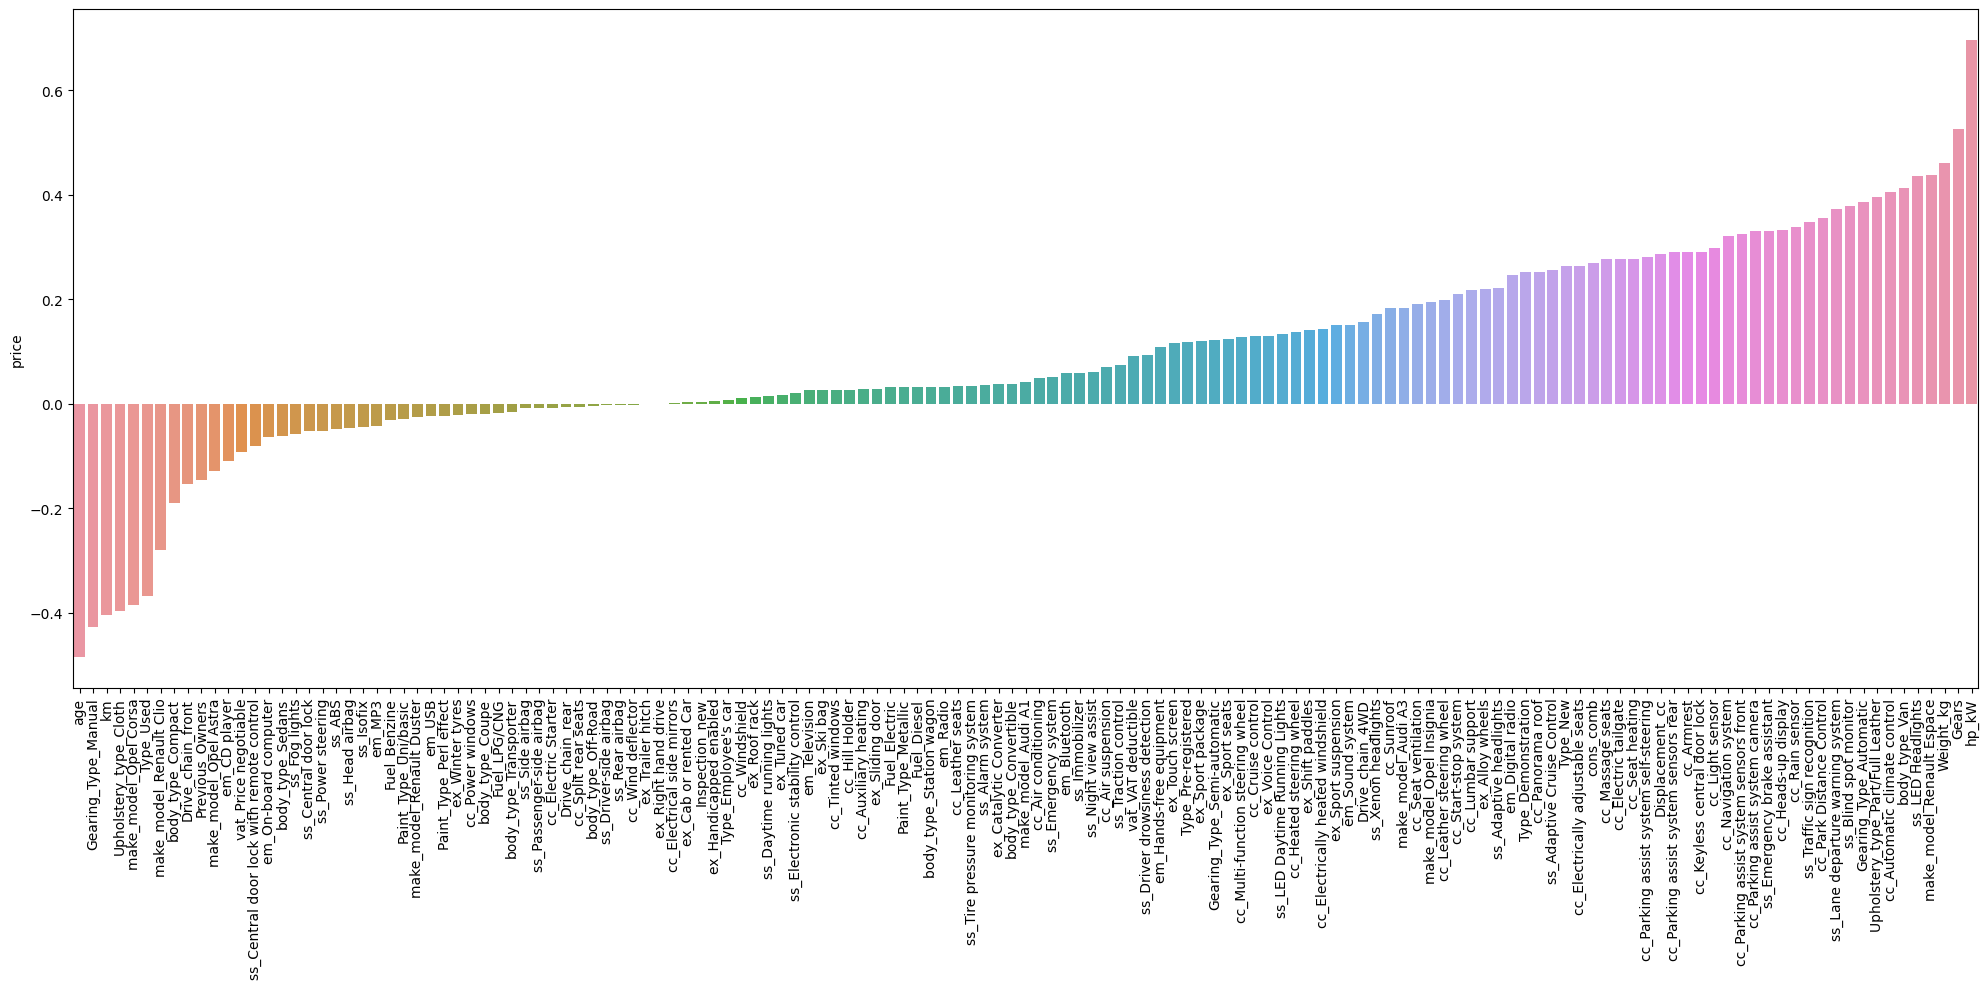

In [59]:
plt.figure(figsize = (20,10))
sns.barplot(x = corr_by_price.index, y = corr_by_price)
plt.xticks(rotation=90)
plt.tight_layout();

# Modeling

LinearRegression

In [60]:
def train_val(model, X_train, y_train, X_test, y_test):

    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},

    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}

    return pd.DataFrame(scores)

In [61]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [62]:
pd.options.display.float_format = '{:.3f}'.format

In [63]:
train_val(lm, X_train, y_train, X_test, y_test)

,train,test
R2,0.890,0.883
mae,1716.122,1718.822
mse,6081146.130,6340036.009
rmse,2465.998,2517.943


In [64]:
def adj_r2(y_test, y_pred, df):
    r2 = r2_score(y_test, y_pred)
    n = df.shape[0]   # number of observations
    p = df.shape[1]-1 # number of independent variables
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2

In [65]:
y_pred = lm.predict(X_test)

In [66]:
adj_r2(y_test, y_pred, df)

0.8832790533688292

In [67]:
model = LinearRegression()
scores = cross_validate(model, X_train, y_train, scoring=['r2',
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10)


In [68]:
pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                                   0.885
test_neg_mean_absolute_error          -1744.706
test_neg_mean_squared_error        -6328987.941
test_neg_root_mean_squared_error      -2512.961
dtype: float64

In [69]:
train_val(lm, X_train, y_train, X_test, y_test)

,train,test
R2,0.890,0.883
mae,1716.122,1718.822
mse,6081146.130,6340036.009
rmse,2465.998,2517.943


In [70]:
2405/df.price.mean()

0.13287101729516826

In [71]:
# #Prediction Error
# from yellowbrick.regressor import PredictionError
# from yellowbrick.features import RadViz

# visualizer = RadViz(size=(720, 3000))
# model = LinearRegression()
# visualizer = PredictionError(model)
# visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
# visualizer.score(X_test, y_test)  # Evaluate the model on the test data
# visualizer.show();

In [72]:
# # Residual Plot
# plt.figure(figsize=(12,8))
residuals = y_test-y_pred

# sns.scatterplot(x = y_test, y = -residuals) #-residuals
# plt.axhline(y = 0, color ="r", linestyle = "--")
# plt.ylabel("residuals")
# plt.show()


<Axes: xlabel='price', ylabel='Density'>

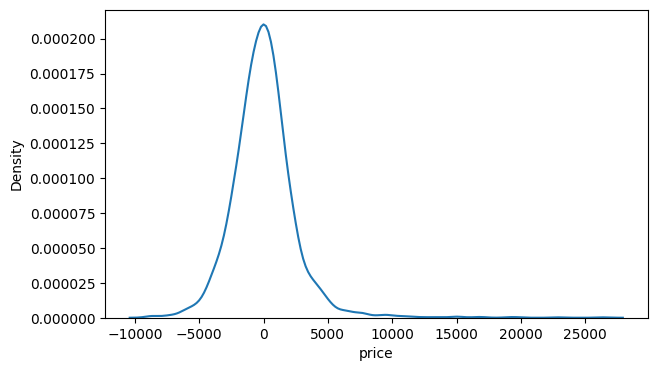

In [73]:
sns.kdeplot(residuals)

Dropping that worsen my predictions

In [74]:
for model in df2.make_model.unique():

    car_prices = df2[df2["make_model"]== model]["price"]

    Q1 = car_prices.quantile(0.25)
    Q3 = car_prices.quantile(0.75)

    IQR = Q3-Q1

    lower_lim = Q1-1.5*IQR
    upper_lim = Q3+1.5*IQR

    drop_index = df2[df2["make_model"]== model][(car_prices < lower_lim) | (car_prices > upper_lim)].index
    df2.drop(index = drop_index, inplace=True)
df2

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,56013.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,2.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1220.000,front,3.800
1,Audi A1,Sedans,14500,Price negotiable,80000.000,Used,Benzine,7.000,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",2.000,1.000,141.000,0,Metallic,Cloth,Automatic,1798.000,1255.000,front,5.600
2,Audi A1,Sedans,14640,VAT deductible,83450.000,Used,Diesel,7.000,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.000,1.000,85.000,0,Metallic,Cloth,Automatic,1598.000,1135.000,front,3.800
3,Audi A1,Sedans,14500,VAT deductible,73000.000,Used,Diesel,6.000,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",3.000,1.000,66.000,0,Metallic,Cloth,Automatic,1422.000,1195.000,front,3.800
4,Audi A1,Sedans,16790,VAT deductible,16200.000,Used,Diesel,7.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",3.000,1.000,66.000,1,Metallic,Cloth,Automatic,1422.000,1135.000,front,4.100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15910,Renault Espace,Van,39950,VAT deductible,1647.363,New,Diesel,6.000,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Hands-free equipment,O...","Alloy wheels,Touch screen","ABS,Central door lock,Central door lock with r...",0.000,1.000,147.000,0,Metallic,Part/Full Leather,Automatic,1997.000,1758.000,front,5.300
15911,Renault Espace,Van,39885,VAT deductible,9900.000,Used,Benzine,7.000,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Hands-free equipment,R...","Alloy wheels,Touch screen,Voice Control","ABS,Adaptive Cruise Control,Blind spot monitor...",0.000,1.000,165.000,0,Metallic,Cloth,Automatic,1798.000,1708.000,front,7.400
15912,Renault Espace,Van,39875,VAT deductible,15.000,Pre-registered,Diesel,6.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...",Alloy wheels,"ABS,Adaptive Cruise Control,Blind spot monitor...",0.000,1.000,146.000,1,Metallic,Part/Full Leather,Automatic,1997.000,1734.000,front,5.300
15913,Renault Espace,Van,39700,VAT deductible,10.000,Pre-registered,Diesel,6.000,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Radio,USB","Alloy wheels,Touch screen","ABS,Blind spot monitor,Driver-side airbag,Elec...",0.000,1.000,147.000,0,Metallic,Part/Full Leather,Automatic,1997.000,1758.000,front,5.300


In [75]:
len(df[df.price>35000])

473

In [76]:
15378+473

15851

In [77]:
df2[df2.make_model=="Audi A2"]

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
2614,Audi A2,Off-Road,28200,VAT deductible,26166.000,Employee's car,Diesel,6.000,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...",Alloy wheels,"ABS,Adaptive Cruise Control,Central door lock,...",1.000,1.000,85.000,0,Metallic,Cloth,Manual,1598.000,1135.000,front,4.900


In [78]:
df2.drop(index=[2614], inplace =True)

In [79]:
df2.reset_index(drop=True, inplace=True)

In [80]:
df3 = df2.copy()

In [81]:
X = df2.drop(columns = "price")
y = df2.price

X_train, X_test, y_train, y_test = trans_1(X, y)
X_train, X_test = trans_2(X_train, X_test)

In [82]:
lm2 = LinearRegression()
lm2.fit(X_train,y_train)

LinearRegression()

In [83]:
train_val(lm2, X_train, y_train, X_test, y_test)

,train,test
R2,0.903,0.901
mae,1518.224,1481.413
mse,4525325.362,4211154.138
rmse,2127.281,2052.110


In [84]:
model = LinearRegression()
scores = cross_validate(model, X_train, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=10)

In [85]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:]

,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.890,-1559.180,-4658118.105,-2158.267
2,0.905,-1498.636,-4352826.134,-2086.343
3,0.900,-1594.566,-4861445.496,-2204.869
4,0.902,-1517.907,-4708068.296,-2169.808
5,0.887,-1604.840,-5239239.615,-2288.939
6,0.907,-1546.887,-4679325.698,-2163.175
7,0.903,-1470.887,-4297323.973,-2072.999
8,0.902,-1535.402,-4796813.919,-2190.163
9,0.903,-1484.923,-4456407.222,-2111.020
10,0.898,-1578.748,-4599376.962,-2144.616


In [86]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                   0.900
test_neg_mean_absolute_error          -1539.198
test_neg_mean_squared_error        -4664894.542
test_neg_root_mean_squared_error      -2159.020
dtype: float64

In [87]:
train_val(lm2, X_train, y_train, X_test, y_test)

,train,test
R2,0.903,0.901
mae,1518.224,1481.413
mse,4525325.362,4211154.138
rmse,2127.281,2052.110


In [88]:
y_pred = lm2.predict(X_test)

lm_R2 = r2_score(y_test, y_pred)
lm_mae = mean_absolute_error(y_test, y_pred)
lm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [89]:
my_dict = { 'Actual': y_test, 'Pred': y_pred, 'Residual': y_test-y_pred }
compare = pd.DataFrame(my_dict)

In [90]:
comp_sample = compare.sample(20)
comp_sample

,Actual,Pred,Residual
4721,21490,19827.858,1662.142
9156,13950,14202.882,-252.882
7383,14900,17128.126,-2228.126
9532,9950,12045.784,-2095.784
196,17900,17908.746,-8.746
5442,23900,24507.277,-607.277
14030,18500,20735.095,-2235.095
1502,16445,16418.982,26.018
11459,17950,17372.185,577.815
15011,19900,20929.060,-1029.060


Scaling

In [91]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Ridge Regression

In [92]:
from sklearn.linear_model import Ridge
ridge_model = Ridge()
ridge_model.fit(X_train_scaled, y_train)

Ridge()

In [93]:
train_val(ridge_model, X_train_scaled, y_train, X_test_scaled, y_test)


,train,test
R2,0.903,0.901
mae,1517.807,1481.156
mse,4526621.303,4208207.883
rmse,2127.586,2051.392


In [94]:
model = Ridge()
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'],
                        cv=10)

In [95]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                   0.900
test_neg_mean_absolute_error          -1537.878
test_neg_mean_squared_error        -4661825.627
test_neg_root_mean_squared_error      -2158.291
dtype: float64

Finding best alpha for Ridge

In [96]:
from sklearn.model_selection import GridSearchCV
alpha_space = np.linspace(0.01, 100, 100)
alpha_space

array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2.627e+01, 2.728e+01, 2.829e+01, 2.930e+01,
       3.031e+01, 3.132e+01, 3.233e+01, 3.334e+01, 3.435e+01, 3.536e+01,
       3.637e+01, 3.738e+01, 3.839e+01, 3.940e+01, 4.041e+01, 4.142e+01,
       4.243e+01, 4.344e+01, 4.445e+01, 4.546e+01, 4.647e+01, 4.748e+01,
       4.849e+01, 4.950e+01, 5.051e+01, 5.152e+01, 5.253e+01, 5.354e+01,
       5.455e+01, 5.556e+01, 5.657e+01, 5.758e+01, 5.859e+01, 5.960e+01,
       6.061e+01, 6.162e+01, 6.263e+01, 6.364e+01, 6.465e+01, 6.566e+01,
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 

In [97]:
ridge_model = Ridge()

param_grid = {'alpha':alpha_space}

ridge_grid_model = GridSearchCV(estimator=ridge_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [98]:
ridge_grid_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2.627e+01, 2.728e...
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 8.283e+01, 8.384e+01,
       8.485e+01, 8.586e+01, 8.687e+01, 8.788e+01, 8.889e+01, 8.990e+01,
       9.091e+01, 9.192e+01, 9.293e+01, 9.394e+01, 9.495e+01, 9.596e+01,
       9.697e+01, 9.798e+01, 9.899e+01, 1.000e+02])},
             scoring='neg_root_mean_squared_error')

In [99]:
ridge_grid_model.best_params_

{'alpha': 1.02}

In [100]:
ridge_grid_model.best_index_

1

In [101]:
ridge_grid_model.best_score_

-2158.2902229095757

In [102]:
train_val(ridge_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.903,0.901
mae,1517.801,1481.154
mse,4526668.823,4208183.699
rmse,2127.597,2051.386


In [103]:
y_pred = ridge_grid_model.predict(X_test_scaled)
rm_R2 = r2_score(y_test, y_pred)
rm_mae = mean_absolute_error(y_test, y_pred)
rm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [104]:
ridge = Ridge(alpha=1.02).fit(X_train_scaled, y_train)

pd.DataFrame(ridge.coef_, index = X_train.columns, columns=["Coef"]).sort_values("Coef")

,Coef
km,-10843.935
make_model_Renault Duster,-7106.839
age,-4855.866
make_model_Opel Corsa,-3357.546
make_model_Renault Clio,-3199.413
...,...
Gears,2037.466
make_model_Audi A1,2627.070
make_model_Audi A3,3868.552
make_model_Renault Espace,6880.162


Lasso Regression

In [105]:
from sklearn.linear_model import Lasso
lasso_model = Lasso()
lasso_model.fit(X_train_scaled, y_train)

Lasso()

In [106]:
train_val(lasso_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.903,0.901
mae,1518.916,1481.335
mse,4537038.004,4207945.458
rmse,2130.032,2051.328


In [107]:
model = Lasso()
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'],
                        cv=10)

In [108]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                   0.900
test_neg_mean_absolute_error          -1536.645
test_neg_mean_squared_error        -4655455.935
test_neg_root_mean_squared_error      -2156.801
dtype: float64

Finding best alpha for Lasso

In [109]:
lasso_model = Lasso()

param_grid = {'alpha':alpha_space}

lasso_grid_model = GridSearchCV(estimator=lasso_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [110]:
lasso_grid_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2.627e+01, 2.728e...
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 8.283e+01, 8.384e+01,
       8.485e+01, 8.586e+01, 8.687e+01, 8.788e+01, 8.889e+01, 8.990e+01,
       9.091e+01, 9.192e+01, 9.293e+01, 9.394e+01, 9.495e+01, 9.596e+01,
       9.697e+01, 9.798e+01, 9.899e+01, 1.000e+02])},
             scoring='neg_root_mean_squared_error')

In [111]:
lasso_grid_model.best_params_

{'alpha': 1.02}

In [112]:
lasso_grid_model.best_score_

-2156.8108723469936

In [113]:
train_val(lasso_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.903,0.901
mae,1518.947,1481.389
mse,4537314.905,4208185.278
rmse,2130.097,2051.386


In [114]:
y_pred = lasso_grid_model.predict(X_test_scaled)
lasm_R2 = r2_score(y_test, y_pred)
lasm_mae = mean_absolute_error(y_test, y_pred)
lasm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [115]:
lasso = Lasso(alpha=1.02).fit(X_train_scaled, y_train)
pd.DataFrame(lasso.coef_, index = X_train.columns, columns=["Coef"]).sort_values("Coef")

,Coef
km,-10825.432
make_model_Renault Duster,-6233.585
age,-4864.916
make_model_Opel Corsa,-3479.266
make_model_Renault Clio,-3310.125
...,...
Gears,2019.102
make_model_Audi A1,2471.267
make_model_Audi A3,3669.711
make_model_Renault Espace,6654.394


Elastic-Net

In [116]:
from sklearn.linear_model import ElasticNet
elastic_model = ElasticNet()
elastic_model.fit(X_train_scaled,y_train)

ElasticNet()

In [117]:
train_val(elastic_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.626,0.642
mae,3143.111,2973.192
mse,17415817.142,15223120.100
rmse,4173.226,3901.682


In [118]:
model = ElasticNet()
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'],
                        cv=10)

In [119]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                    0.624
test_neg_mean_absolute_error           -3148.631
test_neg_mean_squared_error        -17481386.348
test_neg_root_mean_squared_error       -4178.731
dtype: float64

Finding best alpha and l1_ratio for ElasticNet

In [120]:
elastic_model = ElasticNet()

param_grid = {'alpha':[1.02, 2,  3, 4, 5, 7, 10, 11],
              'l1_ratio':[.5, .7, .9, .95, .99, 1]}

elastic_grid_model = GridSearchCV(estimator=elastic_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [121]:
elastic_grid_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': [1.02, 2, 3, 4, 5, 7, 10, 11],
                         'l1_ratio': [0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_root_mean_squared_error')

In [122]:
elastic_grid_model.best_params_

{'alpha': 1.02, 'l1_ratio': 1}

In [123]:
elastic_grid_model.best_score_

-2156.8108723469936

In [124]:
train_val(elastic_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.903,0.901
mae,1518.947,1481.389
mse,4537314.905,4208185.278
rmse,2130.097,2051.386


In [125]:
y_pred = elastic_grid_model.predict(X_test_scaled)
em_R2 = r2_score(y_test, y_pred)
em_mae = mean_absolute_error(y_test, y_pred)
em_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

Feature İmportance

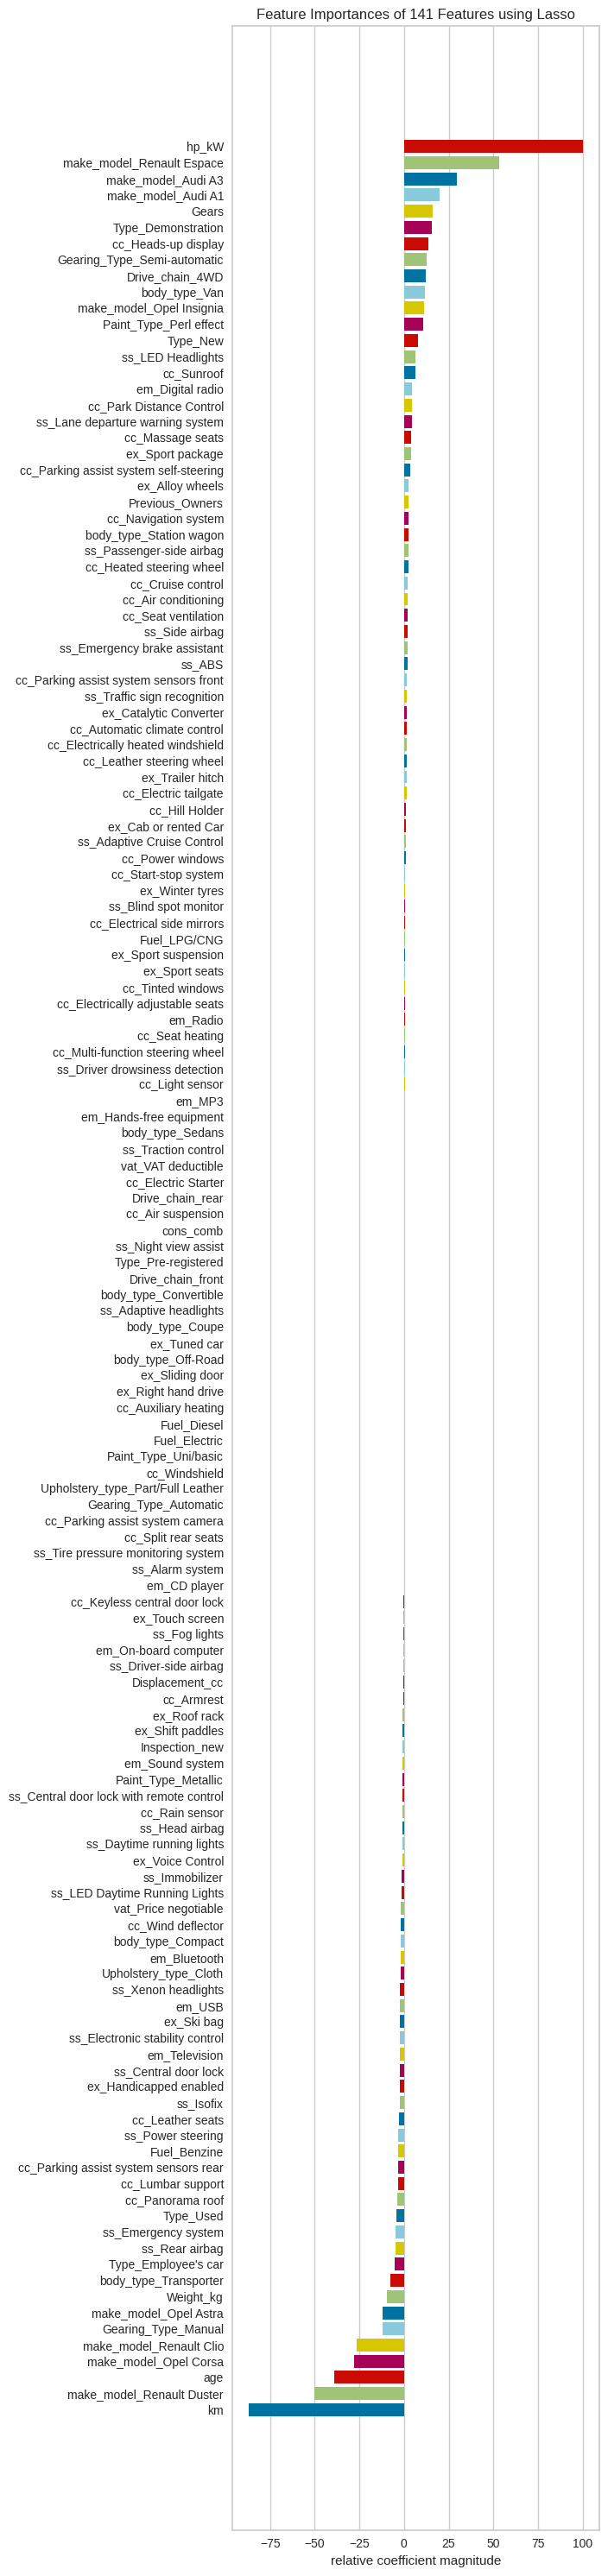

In [126]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

model = Lasso(alpha=1.02)

viz = FeatureImportances(model, labels=X_train.columns)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train_scaled, y_train)
viz.show();

In [127]:
df_new = df3[["make_model", "hp_kW", "km","age", "price", "Gearing_Type", "Gears"]]
df_new.head()

,make_model,hp_kW,km,age,price,Gearing_Type,Gears
0,Audi A1,66.000,56013.000,3.000,15770,Automatic,7.000
1,Audi A1,141.000,80000.000,2.000,14500,Automatic,7.000
2,Audi A1,85.000,83450.000,3.000,14640,Automatic,7.000
3,Audi A1,66.000,73000.000,3.000,14500,Automatic,6.000
4,Audi A1,66.000,16200.000,3.000,16790,Automatic,7.000


In [128]:
X = df_new.drop(columns = ["price"])
y = df_new.price

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [130]:
X_train, X_test = trans_2(X_train, X_test)

In [131]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [132]:
lasso_model = Lasso()
lasso_model.fit(X_train_scaled, y_train)
train_val(lasso_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.874,0.869
mae,1707.784,1682.861
mse,5848242.202,5590499.346
rmse,2418.314,2364.424


In [133]:
model = Lasso()
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'],
                        cv=10)

In [134]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                   0.874
test_neg_mean_absolute_error          -1710.374
test_neg_mean_squared_error        -5868070.271
test_neg_root_mean_squared_error      -2421.404
dtype: float64

In [135]:
lasso_model = Lasso()

param_grid = {'alpha':alpha_space}

lasso_final_model = GridSearchCV(estimator=lasso_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [136]:
lasso_final_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2.627e+01, 2.728e...
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 8.283e+01, 8.384e+01,
       8.485e+01, 8.586e+01, 8.687e+01, 8.788e+01, 8.889e+01, 8.990e+01,
       9.091e+01, 9.192e+01, 9.293e+01, 9.394e+01, 9.495e+01, 9.596e+01,
       9.697e+01, 9.798e+01, 9.899e+01, 1.000e+02])},
             scoring='neg_root_mean_squared_error')

In [137]:
best_model = lasso_final_model.best_estimator_

In [138]:
lasso_final_model.best_params_

{'alpha': 0.01}

In [139]:
lasso_final_model.best_score_

-2421.251838803831

In [140]:
train_val(lasso_final_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.874,0.869
mae,1709.112,1683.801
mse,5847490.840,5592442.063
rmse,2418.159,2364.834


In [141]:
y_pred = lasso_final_model.predict(X_test_scaled)
fm_R2 = r2_score(y_test, y_pred)
fm_mae = mean_absolute_error(y_test, y_pred)
fm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

compare Models Performance

In [142]:
scores = {"linear_m": {"r2_score": lm_R2 ,
 "mae": lm_mae,
 "rmse": lm_rmse},

 "ridge_m": {"r2_score": rm_R2,
 "mae": rm_mae,
 "rmse": rm_rmse},

 "lasso_m": {"r2_score": lasm_R2,
 "mae": lasm_mae,
 "rmse": lasm_rmse},

 "elastic_m": {"r2_score": em_R2,
 "mae": em_mae,
 "rmse": em_rmse},

 "final_m": {"r2_score": fm_R2,
 "mae": fm_mae ,
 "rmse": fm_rmse}}
scores = pd.DataFrame(scores).T
scores

,r2_score,mae,rmse
linear_m,0.901,1481.413,2052.110
ridge_m,0.901,1481.154,2051.386
lasso_m,0.901,1481.389,2051.386
elastic_m,0.901,1481.389,2051.386
final_m,0.869,1683.801,2364.834


In [143]:
for i, j in enumerate(scores):
    print(i, j)

0 r2_score
1 mae
2 rmse


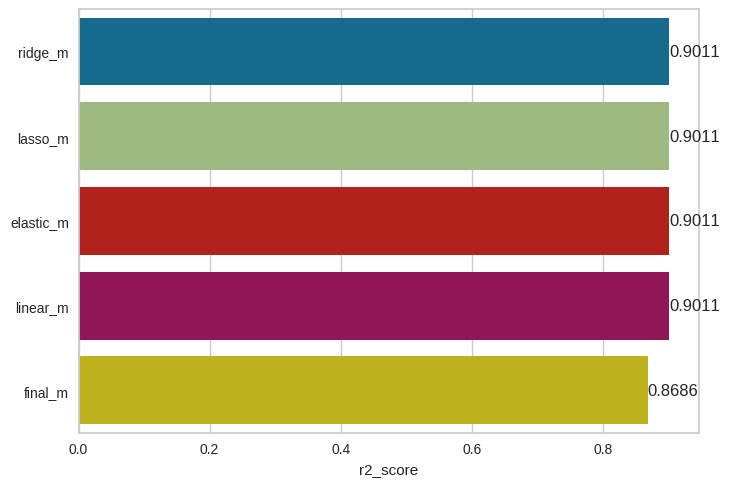

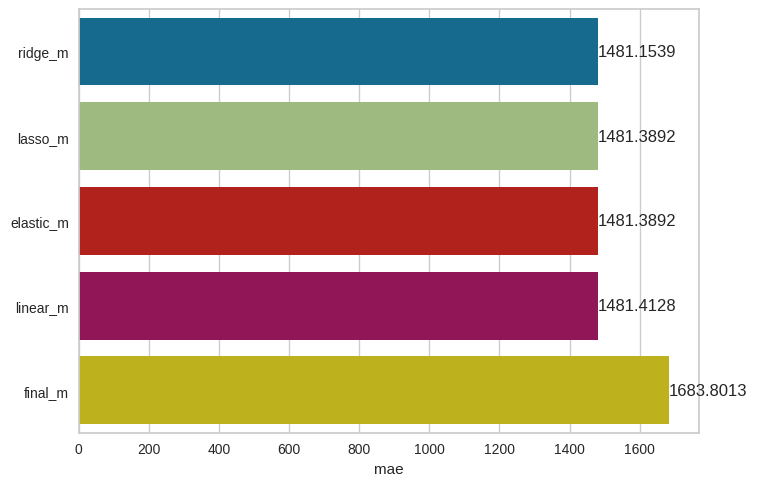

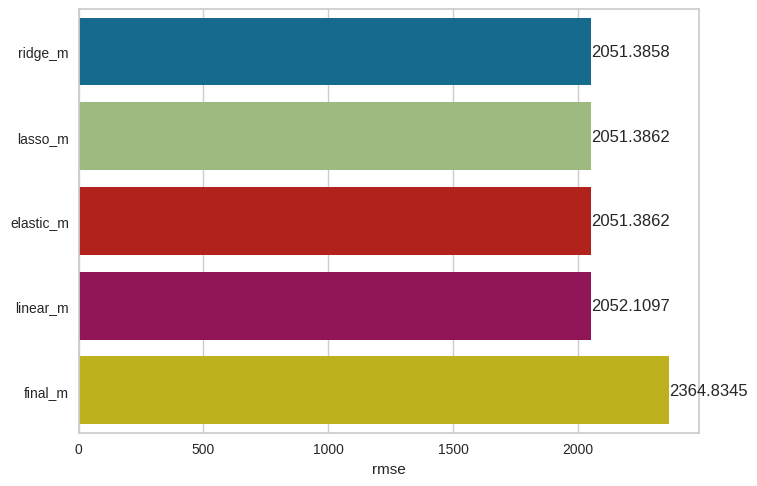

In [144]:
#metrics = scores.columns
for i, j in enumerate(scores):
    plt.figure(i)
    if j == "r2_score":
        ascending = False
    else:
        ascending = True
    compare = scores.sort_values(by=j, ascending=ascending)
    ax = sns.barplot(x = compare[j] , y= compare.index)
    ax.bar_label(ax.containers[0], fmt="%.4f");

Prediction new observation

In [145]:
X = df_new.drop(columns = ["price"])
y = df_new.price

In [146]:
X.head()

,make_model,hp_kW,km,age,Gearing_Type,Gears
0,Audi A1,66.000,56013.000,3.000,Automatic,7.000
1,Audi A1,141.000,80000.000,2.000,Automatic,7.000
2,Audi A1,85.000,83450.000,3.000,Automatic,7.000
3,Audi A1,66.000,73000.000,3.000,Automatic,6.000
4,Audi A1,66.000,16200.000,3.000,Automatic,7.000


In [147]:
cat = X.select_dtypes("object").columns
cat = list(cat)
cat

['make_model', 'Gearing_Type']

In [148]:
enc = OneHotEncoder(handle_unknown="ignore", sparse=False)

X_cat = pd.DataFrame(enc.fit_transform(X[cat]), index = X.index,
                           columns = enc.get_feature_names_out(cat))

X = X_cat.join(X)
X.drop(columns = cat, inplace=True)
X

,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic,hp_kW,km,age,Gears
0,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,66.000,56013.000,3.000,7.000
1,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,141.000,80000.000,2.000,7.000
2,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,85.000,83450.000,3.000,7.000
3,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,66.000,73000.000,3.000,6.000
4,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,66.000,16200.000,3.000,7.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15490,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,147.000,1647.363,0.000,6.000
15491,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,165.000,9900.000,0.000,7.000
15492,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,146.000,15.000,0.000,6.000
15493,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,147.000,10.000,0.000,6.000


In [149]:
final_scaler = MinMaxScaler()
final_scaler.fit(X)
X_scaled = final_scaler.transform(X)

In [150]:
final_model = Lasso(alpha=0.01)

In [151]:
final_model.fit(X_scaled, y)

Lasso(alpha=0.01)

In [152]:
my_dict = {
    "hp_kW": 66,
    "age": 2,
    "km": 17000,
    "Gears": 7,
    "make_model": 'Audi A3',
    "Gearing_Type": "Automatic"
}

In [153]:
new_obs = pd.DataFrame([my_dict])
new_obs

,hp_kW,age,km,Gears,make_model,Gearing_Type
0,66,2,17000,7,Audi A3,Automatic


In [154]:
onehot = pd.DataFrame(enc.transform(new_obs[cat]), index=new_obs.index,
                           columns = enc.get_feature_names_out(cat))
new_obs = onehot.join(new_obs)
new_obs.drop(columns = cat, inplace=True)
new_obs

,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic,hp_kW,age,km,Gears
0,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,66,2,17000,7


In [155]:
new_obs = new_obs.reindex(columns=X.columns)
new_obs

,make_model_Audi A1,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic,hp_kW,km,age,Gears
0,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,66,17000,2,7


In [156]:
new_obs = final_scaler.transform(new_obs)
new_obs

array([[0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.13065327, 0.05362776, 0.66666667, 0.66666667]])

In [157]:
final_model.predict(new_obs)

array([19532.1679574])

Pipeline

In [158]:
X = df_new.drop(columns = ["price"])
y = df_new.price

In [159]:
cat = X.select_dtypes("object").columns
cat = list(cat)
cat

['make_model', 'Gearing_Type']

In [160]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat),
                                       remainder=MinMaxScaler())

In [161]:
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline

operations = [("OneHotEncoder", column_trans), ("Lasso", Lasso())]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X, y)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model',
                                                   'Gearing_Type'])])),
                ('Lasso', Lasso())])

In [162]:
my_dict = {
    "hp_kW": 66,
    "age": 2,
    "km": 17000,
    "Gears": 7,
    "make_model": 'Audi A3',
    "Gearing_Type": "Automatic"

}

In [163]:
new_obs = pd.DataFrame([my_dict])
new_obs

,hp_kW,age,km,Gears,make_model,Gearing_Type
0,66,2,17000,7,Audi A3,Automatic


In [164]:
pipe_model.predict(new_obs)

array([19532.47726492])

Cross Validate With Pipeline

In [165]:
X = df_new.drop(columns = ["price"])
y = df_new.price

In [166]:
cat = X.select_dtypes("object").columns
cat = list(cat)
cat

['make_model', 'Gearing_Type']

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [168]:
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat),
                                       remainder=MinMaxScaler())

operations = [("OneHotEncoder", column_trans), ("Lasso", Lasso())]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['make_model',
                                                   'Gearing_Type'])])),
                ('Lasso', Lasso())])

In [169]:
pipe_model.predict(new_obs)

array([19529.88233003])

In [170]:
train_val(pipe_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.874,0.869
mae,1707.784,1682.861
mse,5848242.202,5590499.346
rmse,2418.314,2364.424


In [171]:
operations = [("OneHotEncoder", column_trans), ("Lasso", Lasso())]

pipe_model = Pipeline(steps=operations)

scores = cross_validate(pipe_model, X_train, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'],
                        cv=10)
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                                   0.874
test_neg_mean_absolute_error          -1710.422
test_neg_mean_squared_error        -5868226.511
test_neg_root_mean_squared_error      -2421.436
dtype: float64

In [172]:
import pickle

# To save a pipline using pickle:
pickle.dump(pipe_model, open("my_model.pkl", "wb"))

In [173]:
# # Save the selected model
# from joblib import dump
# dump(best_model, 'my_model.pkl')

In [174]:
# # Load the saved model
# from joblib import load
# model = load('my_model.pkl')